In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import torch

from   data import GTExConfig, GTExDataset
from   models import VAE
import plotutils

/Users/gwg/local/dmcm


In [2]:
cfg     = GTExConfig()
cfg.IMG_SIZE = 32
cfg.D_EMBEDDINGS = 8
dataset = GTExDataset(cfg)

In [3]:
fname = 'experiments/linear_layers'
state = torch.load('%s/model.pt' % fname, map_location={'cuda:0': 'cpu'})

model = VAE(cfg)
model.load_state_dict(state)

0
250
500
750
1000
1250
1500
1750
2000


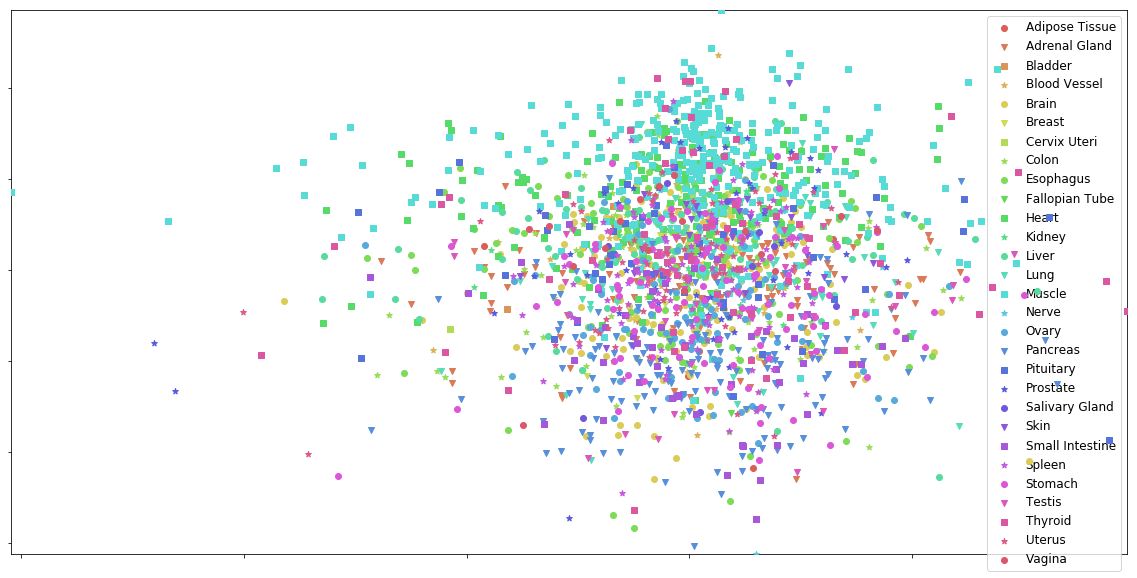

In [4]:
N_SAMPLES   = 2221
LATENT_DIMS = 8

with torch.no_grad():
    X_emb = torch.Tensor(N_SAMPLES, LATENT_DIMS)
    for i in range(N_SAMPLES):
        if i % 250 == 0: print(i)
        x1, x2 = dataset[i]
        x1 = x1.unsqueeze(0)
        _, mu, _, _ = model.forward(x1)
        X_emb[i] = mu

X_emb = X_emb.numpy()
dataset.labels = dataset.labels[:N_SAMPLES]
dataset.images = dataset.images[:N_SAMPLES]

plotutils.plot_both_embeddings([X_emb], dataset=dataset,comp_mode=None)